In [1]:
import scanpy as sc

adata = sc.read_h5ad('/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/zero-shot/Immune_ALL_human.h5ad')
adata

AnnData object with n_obs × n_vars = 33506 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

In [5]:
import scanpy as sc
import anndata

gene_col = "gene_name"
cell_type_key = "celltype"
batch_key = "Sample Characteristic[individual]"

train_data = sc.read_h5ad('/home/share/huadjyin/home/s_jiangwenjian/proj/scLLM/scGPT/data/Cell_annotation/ms/c_data.h5ad')
test_data = sc.read_h5ad('/home/share/huadjyin/home/s_jiangwenjian/proj/scLLM/scGPT/data/Cell_annotation/ms/filtered_ms_adata.h5ad')
test_data.var.index = test_data.var[gene_col]
adata = anndata.concat([train_data, test_data], join='outer')
adata.var[gene_col] = adata.var.index
adata

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 21312 × 3000
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[sampling site]', 'Sample Characteristic Ontology Term[sampling site]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[organism status]', 'Sample Characteristic Ontology Term[organism status]', 'Sample Characteristic[cause of death]', 'Sample Characteristic Ontology Term[cause of death]', 'Sample Characteristic[clinical history]', 'Sample 

In [6]:
from biollm.utils.utils import load_config
from biollm.base.load_scgpt import LoadScgpt

config_file = './configs/scgpt_cell_emb.toml'
configs = load_config(config_file)
# adata = sc.read_h5ad(configs.input_file)
# adata.var_names = adata.var["feature_name"].tolist()
# adata.var["gene_name"] = adata.var["feature_name"]
# adata.obs["celltype_id"] = adata.obs["cell_type"].cat.codes
# adata.obs["batch_id"] = 0
# sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset=True)
obj = LoadScgpt(configs)
adata = adata[:, adata.var_names.isin(obj.get_gene2idx().keys())].copy()
# configs.max_seq_len = adata.var.shape[0] + 1
obj = LoadScgpt(configs)
print(obj.args)
obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(configs.emb_type, adata=adata)
print('embedding shape:', emb.shape)
# scg_cell_emb = pd.DataFrame(emb, index=adata.obs_names)
# cell_emb_file = os.path.join(output_dir, "scg_cell_emb.pkl")
# with open(cell_emb_file, 'wb') as file:
#     pickle.dump(np.array(scg_cell_emb), file)

{'ntoken': 60697, 'd_model': 512, 'nhead': 8, 'd_hid': 512, 'nlayers': 12, 'nlayers_cls': 3, 'n_cls': 1, 'dropout': 0.2, 'pad_token': '<pad>', 'do_mvc': False, 'do_dab': False, 'use_batch_labels': False, 'num_batch_labels': None, 'domain_spec_batchnorm': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'mvc_decoder_style': 'inner product', 'ecs_threshold': 0.3, 'explicit_zero_prob': False, 'fast_transformer_backend': 'flash', 'pre_norm': False, 'vocab': GeneVocab(), 'pad_value': -2, 'n_input_bins': 51, 'use_fast_transformer': True}


2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params encoder.enc_norm.weight with shape torch.Size([512])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params encoder.enc_norm.bias with shape torch.Size([512])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params value_encoder.linear1.bias with shape torch.Size([512])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params value_encoder.linear2.bias with shape torch.Size([512])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params value_encoder.norm.weight with shape torch.Size([512])
2024-08-06 16:55:30-load_llm[line-50]-INFO: Loading params value_encoder

{'ntoken': 60697, 'd_model': 512, 'nhead': 8, 'd_hid': 512, 'nlayers': 12, 'nlayers_cls': 3, 'n_cls': 1, 'dropout': 0.2, 'pad_token': '<pad>', 'do_mvc': False, 'do_dab': False, 'use_batch_labels': False, 'num_batch_labels': None, 'domain_spec_batchnorm': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'mvc_decoder_style': 'inner product', 'ecs_threshold': 0.3, 'explicit_zero_prob': False, 'fast_transformer_backend': 'flash', 'pre_norm': False, 'vocab': GeneVocab(), 'pad_value': -2, 'n_input_bins': 51, 'use_fast_transformer': True}


2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params encoder.enc_norm.weight with shape torch.Size([512])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params encoder.enc_norm.bias with shape torch.Size([512])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params value_encoder.linear1.bias with shape torch.Size([512])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params value_encoder.linear2.bias with shape torch.Size([512])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params value_encoder.norm.weight with shape torch.Size([512])
2024-08-06 16:55:33-load_llm[line-50]-INFO: Loading params value_encoder

Munch({'model_used': 'scgpt', 'emb_type': 'cell', 'model_file': '../../case/models/scgpt/best_model.pt', 'model_param_file': '../../case/models/scgpt/args.json', 'vocab_file': '../../case/models/scgpt/vocab.json', 'input_file': '/home/share/huadjyin/home/s_huluni/project/bio_model/biollm/tutorials/zero-shot/cabe6d98-2da8-4cd4-a8dc-66726eeb104a.h5ad', 'output_dir': '../../case/result/zero-shot/', 'pad_value': -2, 'mask_ratio': 0, 'device': 'cuda:0', 'CLS': False, 'ADV': False, 'CCE': False, 'MVC': False, 'ECS': False, 'do_preprocess': True, 'data_is_raw': False, 'append_cls': True, 'distributed': False, 'include_zero_gene': False, 'input_style': 'binned', 'output_style': 'binned', 'nlayers_cls': 3, 'do_mvc': False, 'do_dab': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'do_sample_in_train': False, 'per_seq_batch_sample': False, 'batch_size': 8, 'max_seq_len': 3000, 'data_source': '/scratch/ssd004/datasets/cellxgene/scb_strict/human', 'save_dir': '/scratch/ssd004/data

2024-08-06 16:55:44-load_scgpt[line-183]-INFO: get dataloader Done!
Cell embedding: 100%|██████████| 2664/2664 [00:59<00:00, 44.85it/s]
2024-08-06 16:56:43-load_scgpt[line-209]-INFO: get cell embedding Done!


embedding shape: (21312, 512)


In [7]:
adata.obsm['X_scGPT'] = emb

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


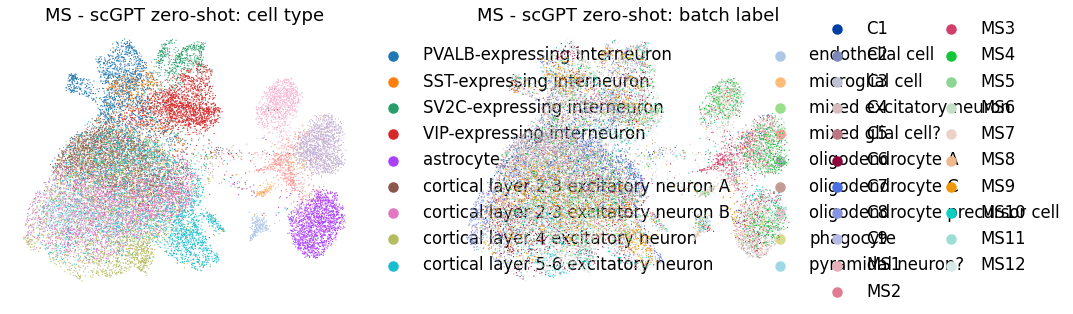

In [8]:
sc.pp.neighbors(adata, use_rep="X_scGPT")
sc.tl.umap(adata)


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


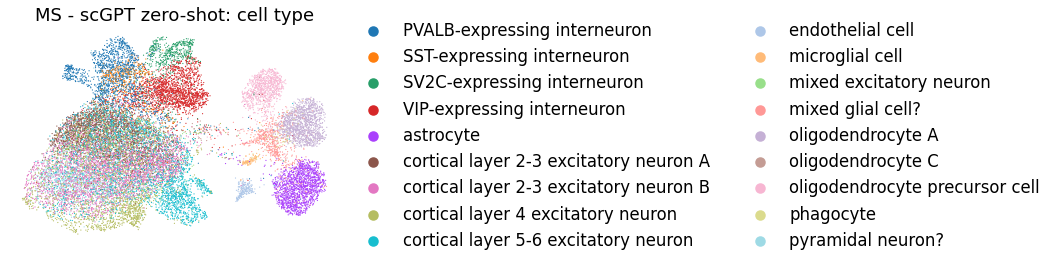

In [9]:
sc.pl.umap(adata, 
           color=[cell_type_key], 
           frameon=False, 
           title=["MS - scGPT zero-shot: cell type"])

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


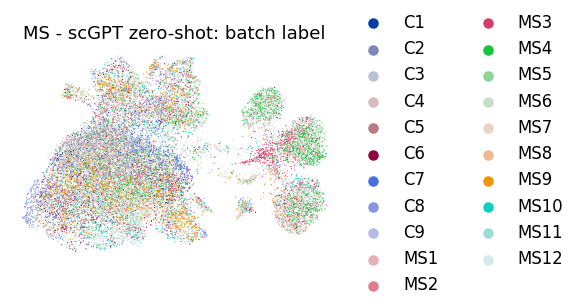

In [10]:
sc.pl.umap(adata, 
           color=[batch_key], 
           frameon=False, 
           title=["MS - scGPT zero-shot: batch label"])

In [24]:
path = '/home/share/huadjyin/home/s_huluni/project/bio_model_240614/Data/INT/dataset4/hPancreas.h5ad'
adata = sc.read_h5ad(path)
from biollm.utils.utils import load_config
from biollm.base.load_scgpt import LoadScgpt

config_file = './configs/scgpt_cell_emb.toml'
configs = load_config(config_file)
# adata = sc.read_h5ad(configs.input_file)
# adata.var_names = adata.var["feature_name"].tolist()
# adata.var["gene_name"] = adata.var["feature_name"]
# adata.obs["celltype_id"] = adata.obs["cell_type"].cat.codes
# adata.obs["batch_id"] = 0
sc.pp.highly_variable_genes(adata, n_top_genes=1200, subset=True)
obj = LoadScgpt(configs)
adata = adata[:, adata.var_names.isin(obj.get_gene2idx().keys())].copy()
# configs.max_seq_len = adata.var.shape[0] + 1
obj = LoadScgpt(configs)
print(obj.args)
obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(configs.emb_type, adata=adata)
print('embedding shape:', emb.shape)
adata.obsm['X_scGPT1'] = emb

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.resul

{'ntoken': 60697, 'd_model': 512, 'nhead': 8, 'd_hid': 512, 'nlayers': 12, 'nlayers_cls': 3, 'n_cls': 1, 'dropout': 0.2, 'pad_token': '<pad>', 'do_mvc': False, 'do_dab': False, 'use_batch_labels': False, 'num_batch_labels': None, 'domain_spec_batchnorm': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'mvc_decoder_style': 'inner product', 'ecs_threshold': 0.3, 'explicit_zero_prob': False, 'fast_transformer_backend': 'flash', 'pre_norm': False, 'vocab': GeneVocab(), 'pad_value': -2, 'n_input_bins': 51, 'use_fast_transformer': True}


2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params encoder.enc_norm.weight with shape torch.Size([512])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params encoder.enc_norm.bias with shape torch.Size([512])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params value_encoder.linear1.bias with shape torch.Size([512])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params value_encoder.linear2.bias with shape torch.Size([512])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params value_encoder.norm.weight with shape torch.Size([512])
2024-08-06 17:15:21-load_llm[line-50]-INFO: Loading params value_encoder

{'ntoken': 60697, 'd_model': 512, 'nhead': 8, 'd_hid': 512, 'nlayers': 12, 'nlayers_cls': 3, 'n_cls': 1, 'dropout': 0.2, 'pad_token': '<pad>', 'do_mvc': False, 'do_dab': False, 'use_batch_labels': False, 'num_batch_labels': None, 'domain_spec_batchnorm': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'mvc_decoder_style': 'inner product', 'ecs_threshold': 0.3, 'explicit_zero_prob': False, 'fast_transformer_backend': 'flash', 'pre_norm': False, 'vocab': GeneVocab(), 'pad_value': -2, 'n_input_bins': 51, 'use_fast_transformer': True}


2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params encoder.enc_norm.weight with shape torch.Size([512])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params encoder.enc_norm.bias with shape torch.Size([512])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params value_encoder.linear1.bias with shape torch.Size([512])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params value_encoder.linear2.bias with shape torch.Size([512])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params value_encoder.norm.weight with shape torch.Size([512])
2024-08-06 17:15:23-load_llm[line-50]-INFO: Loading params value_encoder

Munch({'model_used': 'scgpt', 'emb_type': 'cell', 'model_file': '../../case/models/scgpt/best_model.pt', 'model_param_file': '../../case/models/scgpt/args.json', 'vocab_file': '../../case/models/scgpt/vocab.json', 'input_file': '/home/share/huadjyin/home/s_huluni/project/bio_model/biollm/tutorials/zero-shot/cabe6d98-2da8-4cd4-a8dc-66726eeb104a.h5ad', 'output_dir': '../../case/result/zero-shot/', 'pad_value': -2, 'mask_ratio': 0, 'device': 'cuda:0', 'CLS': False, 'ADV': False, 'CCE': False, 'MVC': False, 'ECS': False, 'do_preprocess': True, 'data_is_raw': False, 'append_cls': True, 'distributed': False, 'include_zero_gene': False, 'input_style': 'binned', 'output_style': 'binned', 'nlayers_cls': 3, 'do_mvc': False, 'do_dab': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'do_sample_in_train': False, 'per_seq_batch_sample': False, 'batch_size': 8, 'max_seq_len': 3000, 'data_source': '/scratch/ssd004/datasets/cellxgene/scb_strict/human', 'save_dir': '/scratch/ssd004/data

2024-08-06 17:15:31-load_scgpt[line-183]-INFO: get dataloader Done!
Cell embedding: 100%|██████████| 1846/1846 [00:38<00:00, 47.59it/s]
2024-08-06 17:16:10-load_scgpt[line-209]-INFO: get cell embedding Done!


embedding shape: (14767, 512)


In [31]:
adata.var

,mean,std,highly_variable,means,dispersions,dispersions_norm,gene_name,id_in_vocab
A2M,0.102675,0.588106,True,2.470882,10.391115,3.705762,A2M,1
ABCA1,0.249390,0.844517,True,2.464433,8.774299,1.976667,ABCA1,1
ABCC9,0.369478,0.902758,True,1.914710,8.659859,2.213786,ABCC9,1
ABCD3,0.848594,1.373491,True,3.059713,8.934873,1.829084,ABCD3,1
ABCG1,0.290541,0.812162,True,1.706364,8.052459,1.569385,ABCG1,1
...,...,...,...,...,...,...,...,...
ZNF876P,0.100547,0.468219,True,1.119281,9.000777,2.622456,ZNF876P,1
ZNF91,0.603951,1.260600,True,2.944832,8.636164,1.511637,ZNF91,1
ZNHIT6,0.370618,0.950668,True,2.170469,8.267304,1.434464,ZNHIT6,1
ZRANB3,0.086007,0.473624,True,0.942703,7.614876,1.504112,ZRANB3,1


In [35]:
sc.pp.neighbors(adata, use_rep="X_scGPT1")
sc.tl.umap(adata, min_dist=1)

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


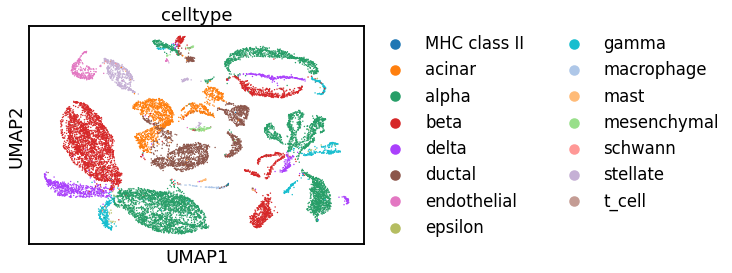

In [28]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, 
           color=['celltype'],
           )

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


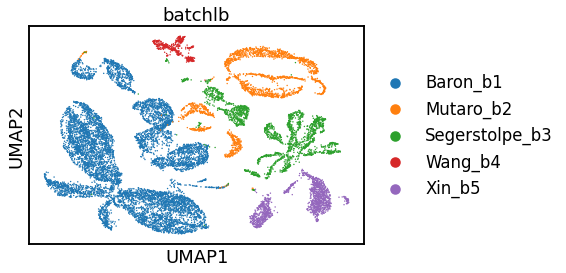

In [30]:
sc.pl.umap(adata, 
           color=['batchlb'],
           )

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


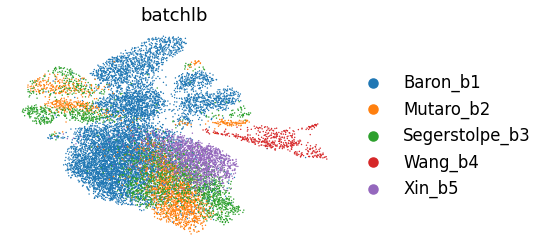

In [36]:
sc.pl.umap(adata, 
           color=['batchlb'], 
           frameon=False)

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


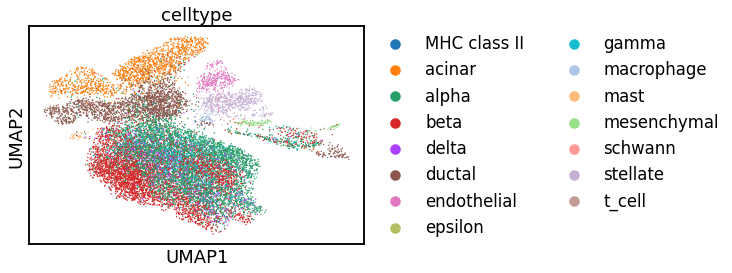

In [37]:
sc.pl.umap(adata, 
           color=['celltype'])